In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
data = pd.read_excel("Mall_customers.xlsx")

In [6]:
df = data

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
dfclean = df.iloc[:,1:]
dfclean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
gender = pd.get_dummies(dfclean['Gender'],drop_first= True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,0


In [11]:
dfclean = pd.concat([dfclean,gender],axis = 1)

In [12]:
dfclean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Male
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [13]:
dfclean = dfclean.drop(['Gender'],axis=1)

In [14]:
dfclean.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [15]:
dfcleanscaled = dfclean.apply(zscore)
# dfcleanscaled = dfclean["Spending Score (1-100)"].apply(zscore) 
# sirf ek particular column ko standardise kr rhe h.
# Check above code.
dfcleanscaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,-1.195890,-1.496694,-0.350337,1.333333
1,-1.048975,-1.496694,1.053686,1.333333
2,-1.122433,-1.375993,-1.453498,-0.750000
3,-0.902060,-1.375993,0.919969,-0.750000
4,-0.314399,-1.255292,-0.316908,-0.750000


### -----------------------Determining the value of K ------------------------------------------

Text(0.5, 1.0, 'Selecting K with help of Elbow Method')

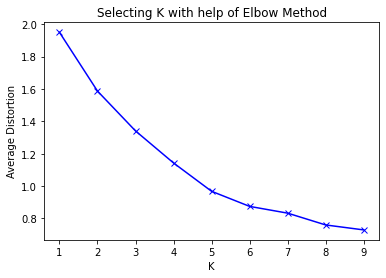

In [16]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(dfcleanscaled)
    meanDistortions.append(sum(np.min(cdist(dfcleanscaled,model.cluster_centers_,"euclidean"),axis=1))/dfcleanscaled.shape[0])
    
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('K')
plt.ylabel('Average Distortion')
plt.title('Selecting K with help of Elbow Method')
    

In [17]:
# lets fisrt start with k = 2 
model = KMeans(n_clusters=2)
model.fit(dfcleanscaled)
predict = model.predict(dfcleanscaled)

# Now append this prediction in df and dfcleanscale
df["Group"] = predict
dfcleanscaled["Group"] = predict

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [18]:
dfcleanscaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Group
0,-1.195890,-1.496694,-0.350337,1.333333,1
1,-1.048975,-1.496694,1.053686,1.333333,1
2,-1.122433,-1.375993,-1.453498,-0.750000,1
3,-0.902060,-1.375993,0.919969,-0.750000,1
4,-0.314399,-1.255292,-0.316908,-0.750000,1


In [19]:
dfcleanscaled.groupby(['Group']).count()

,Age,Annual Income (k$),Spending Score (1-100),Male
Group,,,,
0,20,20,20,20
1,30,30,30,30


In [20]:
data.shape

(50, 6)

In [21]:
# lets fisrt start with k = 5
model = KMeans(n_clusters=5)
model.fit(dfcleanscaled)
predict = model.predict(dfcleanscaled)

# Now append this prediction in df and dfcleanscale
df["Group"] = predict
dfcleanscaled["Group"] = predict

df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4
5,6,Female,22,17,76,4
6,7,Female,35,18,6,3
7,8,Female,23,18,94,4
8,9,Male,64,19,3,2
9,10,Female,30,19,72,4


In [22]:
dfcleanscaled.head()

,Age,Annual Income (k$),Spending Score (1-100),Male,Group
0,-1.195890,-1.496694,-0.350337,1.333333,1
1,-1.048975,-1.496694,1.053686,1.333333,1
2,-1.122433,-1.375993,-1.453498,-0.750000,4
3,-0.902060,-1.375993,0.919969,-0.750000,4
4,-0.314399,-1.255292,-0.316908,-0.750000,4


In [23]:
dfcleanscaledcount = dfcleanscaled.groupby(['Group'])

In [24]:
dfcleanscaledcount.mean()

,Age,Annual Income (k$),Spending Score (1-100),Male
Group,,,,
0,-0.703724,1.050100,0.505448,-0.750000
1,-0.799219,-0.325893,0.812996,1.333333
2,1.228212,-0.184069,-1.077421,1.333333
3,0.891531,0.404349,-0.879632,-0.750000
4,-0.549463,-1.062170,0.599050,-0.750000


In [25]:
dfcleanscaled.groupby(['Group']).count()

,Age,Annual Income (k$),Spending Score (1-100),Male
Group,,,,
0,10,10,10,10
1,10,10,10,10
2,8,8,8,8
3,12,12,12,12
4,10,10,10,10


array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Annual Income (k$)'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Male'}, xlabel='[Group]'>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}, xlabel='[Group]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

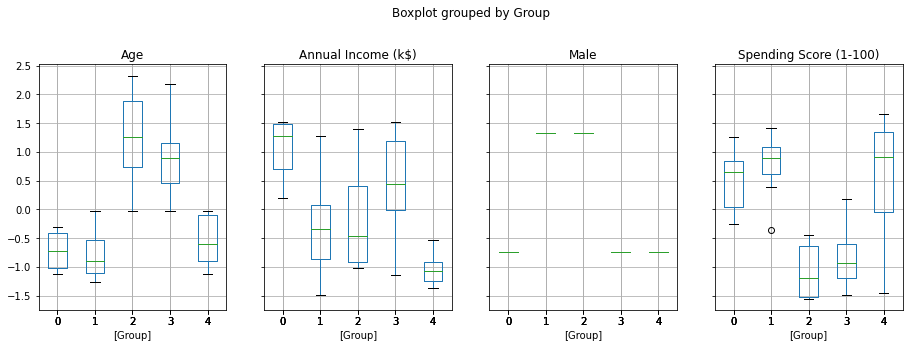

In [26]:
dfcleanscaled.boxplot(by='Group',layout=(2,4),figsize=(15,10))

In [27]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
model2.fit(dfcleanscaled)

#predict2 = model.predict(dfcleanscaled)

# Now append this prediction in df 
df["labels"] = model2.labels_

df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group,labels
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,4,0
5,6,Female,22,17,76,4,0
6,7,Female,35,18,6,3,0
7,8,Female,23,18,94,4,0
8,9,Male,64,19,3,2,0
9,10,Female,30,19,72,4,0


In [28]:
dfcleanscaledcount2 = df.groupby(['labels'])
dfcleanscaledcount2 

In [29]:
dfcleanscaledcount2.mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Group
labels,,,,,
0,21.633333,42.10,25.4,36.333333,3.066667
1,31.300000,25.05,30.4,69.200000,0.500000


In [30]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

# Pairwise distribution between data points
from scipy.spatial.distance import pdist 

In [31]:
z = linkage(dfcleanscaled,metric='euclidean',method = 'average')
c,coph_dists = cophenet(z, pdist(dfcleanscaled))
c

0.8511279217855054

# Dendogram

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

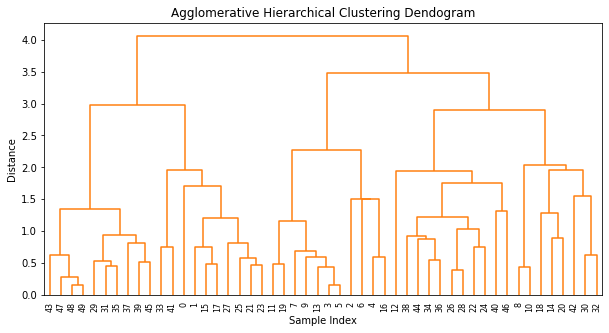

In [32]:
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z,leaf_rotation = 90.,color_threshold=40,leaf_font_size=8.)
plt.tight_layout

#  Exploratory Data Analysis
https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

# Hypothesis Testing
https://www.analyticsvidhya.com/blog/2020/07/hypothesis-testing-68351/
https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/